#Quiz 2 
##**Authomobile**##


# The purpose of this study is to examine the factors that can predict the average mile-per-gallon(MPG) for your car in the city.

The original data set is comprised of 205 observations and 26 attributes. 

**Variables:**
There are 26 attributes that can be used as independent variables.

**Procedures:**

Here are main procedures of this project:

Step1: Load data into the data frame from GitHub

Step2: Exporatory Data Analysis

Step3: Data Cleaning

Step4: Feature Engineering

Step5: Conclusion 


**Attribute Information:**

1. symboling: the degree which is more risky than its price indicates (-3, -2, -1, 0, 1, 2, 3). -3 that the most auto is safe. +3 that the most auto is risky.

2. normalized-losses: continuous from 65 to 256.

3. make: It is brand of car (alfa-romero, audi, bmw, chevrolet, dodge, honda,
isuzu, jaguar, mazda, mercedes-benz, mercury,
mitsubishi, nissan, peugot, plymouth, porsche,
renault, saab, subaru, toyota, volkswagen, volvo).

4. fuel-type: Types of fuels that cars use.(diesel, gas).

5. aspiration: std, turbo.

6. num-of-doors: numbers of doors for each car(four, two).
7. body-style: types of body for each car(hardtop, wagon, sedan, hatchback, convertible).

8. drive-wheels: number of wheels for each car (4wd, fwd, rwd).

9. engine-location: location of engine(front, rear).

10. wheel-base: the distance between the centers of the front and rear wheels (continuous from 86.6 120.9).

11. length: length of car (continuous from 141.1 to 208.1).

12. width: width of car (continuous from 60.3 to 72.3).

13. height: height of car (continuous from 47.8 to 59.8).

14. curb-weight:the weight of an car without occupants of baggage (continuous from 1488 to 4066).

15. engine-type: types of engine (dohc, dohcv, l, ohc, ohcf, ohcv, rotor).

16. num-of-cylinders: numbers of cylinders (eight, five, four, six, three, twelve, two).

17. engine-size: size of engine (continuous from 61 to 326).

18. fuel-system: system of fuel (1bbl, 2bbl, 4bbl, idi, mfi, mpfi, spdi, spfi).

19. bore: continuous from 2.54 to 3.94).

20. stroke: size of cylinder for each car (continuous from 2.07 to 4.17).

21. compression-ratio: the ratio of the maximum to minuimun volume in the cylinder (continuous from 7 to 23.
22. horsepower: engine's power of car (continuous from 48 to 288.
23. peak-rpm: the maximum revolutions per minute (continuous from 4150 to 6600.
24. city-mpg: average miles per gallon for your car in the city(continuous from 13 to 49).

25. highway-mpg: the average MPG for your car on the highway (continuous from 16 to 54).

26. price: the price of car (continuous from 5118 to 45400).


##Data summary and Explorating Data Analysis (EDA)
I write code to summarize the number of use cases, etc. I create charts to display value counts, and create exploratory graphics .

### Step1: Load data into the data frame from GitHub

In [ ]:
#load pandas and numpy libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder, OneHotEncoder 
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report,roc_auc_score
import missingno as msno
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder 
from sklearn.compose import ColumnTransformer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import BayesianRidge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn import (model_selection,preprocessing)


#load the entire dataset from a file uploaded to my GitHub repository
df = pd.read_csv("https://raw.githubusercontent.com/JoannePyo/Data_Analysis_381/main/Quiz_Assignment2/imports-85.csv", 
                 names=['symboling','normalized-losses', 'make','fuel-type','aspiration','num-of-doors','body-style', 'drive-wheels', 
                        'engine-location', 'wheel-base','length', 'width', 'hight','curb-weigth','engine-type','num-of-cylinders','engine-size', 
                        'fuel-system','bore','stroke','compression-ratio','horsepower','peak-rpm', 'city-mpg', 'highway-mpg','price' ])

#create a second stored value of original data as a safety
df_orignal =df

#check the dataset 
print("Observations: {}".format(df.shape[0]))
pd.set_option("display.max_columns", 20)
df

Observations: 205


,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470


### Step2: Exploratory Data Analysis

In [ ]:
#check the shape for the data frame
df.shape

(205, 26)

In [ ]:
#get the statistics of numeric data
df.describe()

,symboling,wheel-base,length,width,hight,curb-weigth,engine-size,compression-ratio,city-mpg,highway-mpg
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,10.142537,25.219512,30.751220
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,3.972040,6.542142,6.886443
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,8.600000,19.000000,25.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,9.400000,30.000000,34.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


In [ ]:
#Identify the data types
df_info=pd.DataFrame(df.dtypes, columns=['data_type'])

#identify the unique values for each variable
df_info['nunique'] = df.nunique()

#check missing balues for each column
df_info['missing_Values']=df.isnull().sum()

#Identify the count for each variable
df_info['zero_Values'] =(df==0).sum()

#how many '?'values
df_info['?_Values'] =(df =='?').sum()

#print out all 
df_info

,data_type,nunique,missing_Values,zero_Values,?_Values
symboling,int64,6,0,67,0
normalized-losses,object,52,0,0,41
make,object,22,0,0,0
fuel-type,object,2,0,0,0
aspiration,object,2,0,0,0
num-of-doors,object,3,0,0,2
body-style,object,5,0,0,0
drive-wheels,object,3,0,0,0
engine-location,object,2,0,0,0
wheel-base,float64,53,0,0,0


#### Check numerical and categorical columns

In [ ]:
num_columns = []
cate_columns = []

for x in df.columns[:]:
  if(df[x].dtype == 'object'):
    cate_columns.append(x)
  else:
    num_columns.append(x)

#print out numerical variable and categorical variable
print(f'Numerical vaiable: {num_columns}')
print(f'Categorical variable: {cate_columns}')

Numerical vaiable: ['symboling', 'wheel-base', 'length', 'width', 'hight', 'curb-weigth', 'engine-size', 'compression-ratio', 'city-mpg', 'highway-mpg']
Categorical variable: ['normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 'drive-wheels', 'engine-location', 'engine-type', 'num-of-cylinders', 'fuel-system', 'bore', 'stroke', 'horsepower', 'peak-rpm', 'price']


#### visualize numerical columns


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

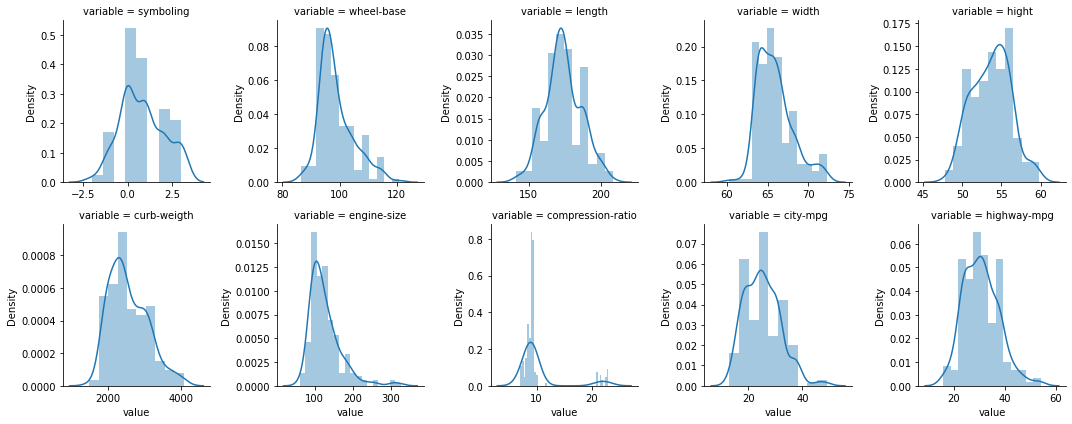

In [ ]:
#Distributions for each of numerical variables
dn = pd.melt(df[num_columns])
n = sns.FacetGrid(dn, col ='variable', col_wrap = 5, sharex=False, sharey=False)
n = n.map(sns.distplot, 'value')
n

##### Findings: 
> When you look at above visual graph, we can see that almost every attribute fit normal distribution, except compression-ratio. 

#### Visualize categorical columns

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

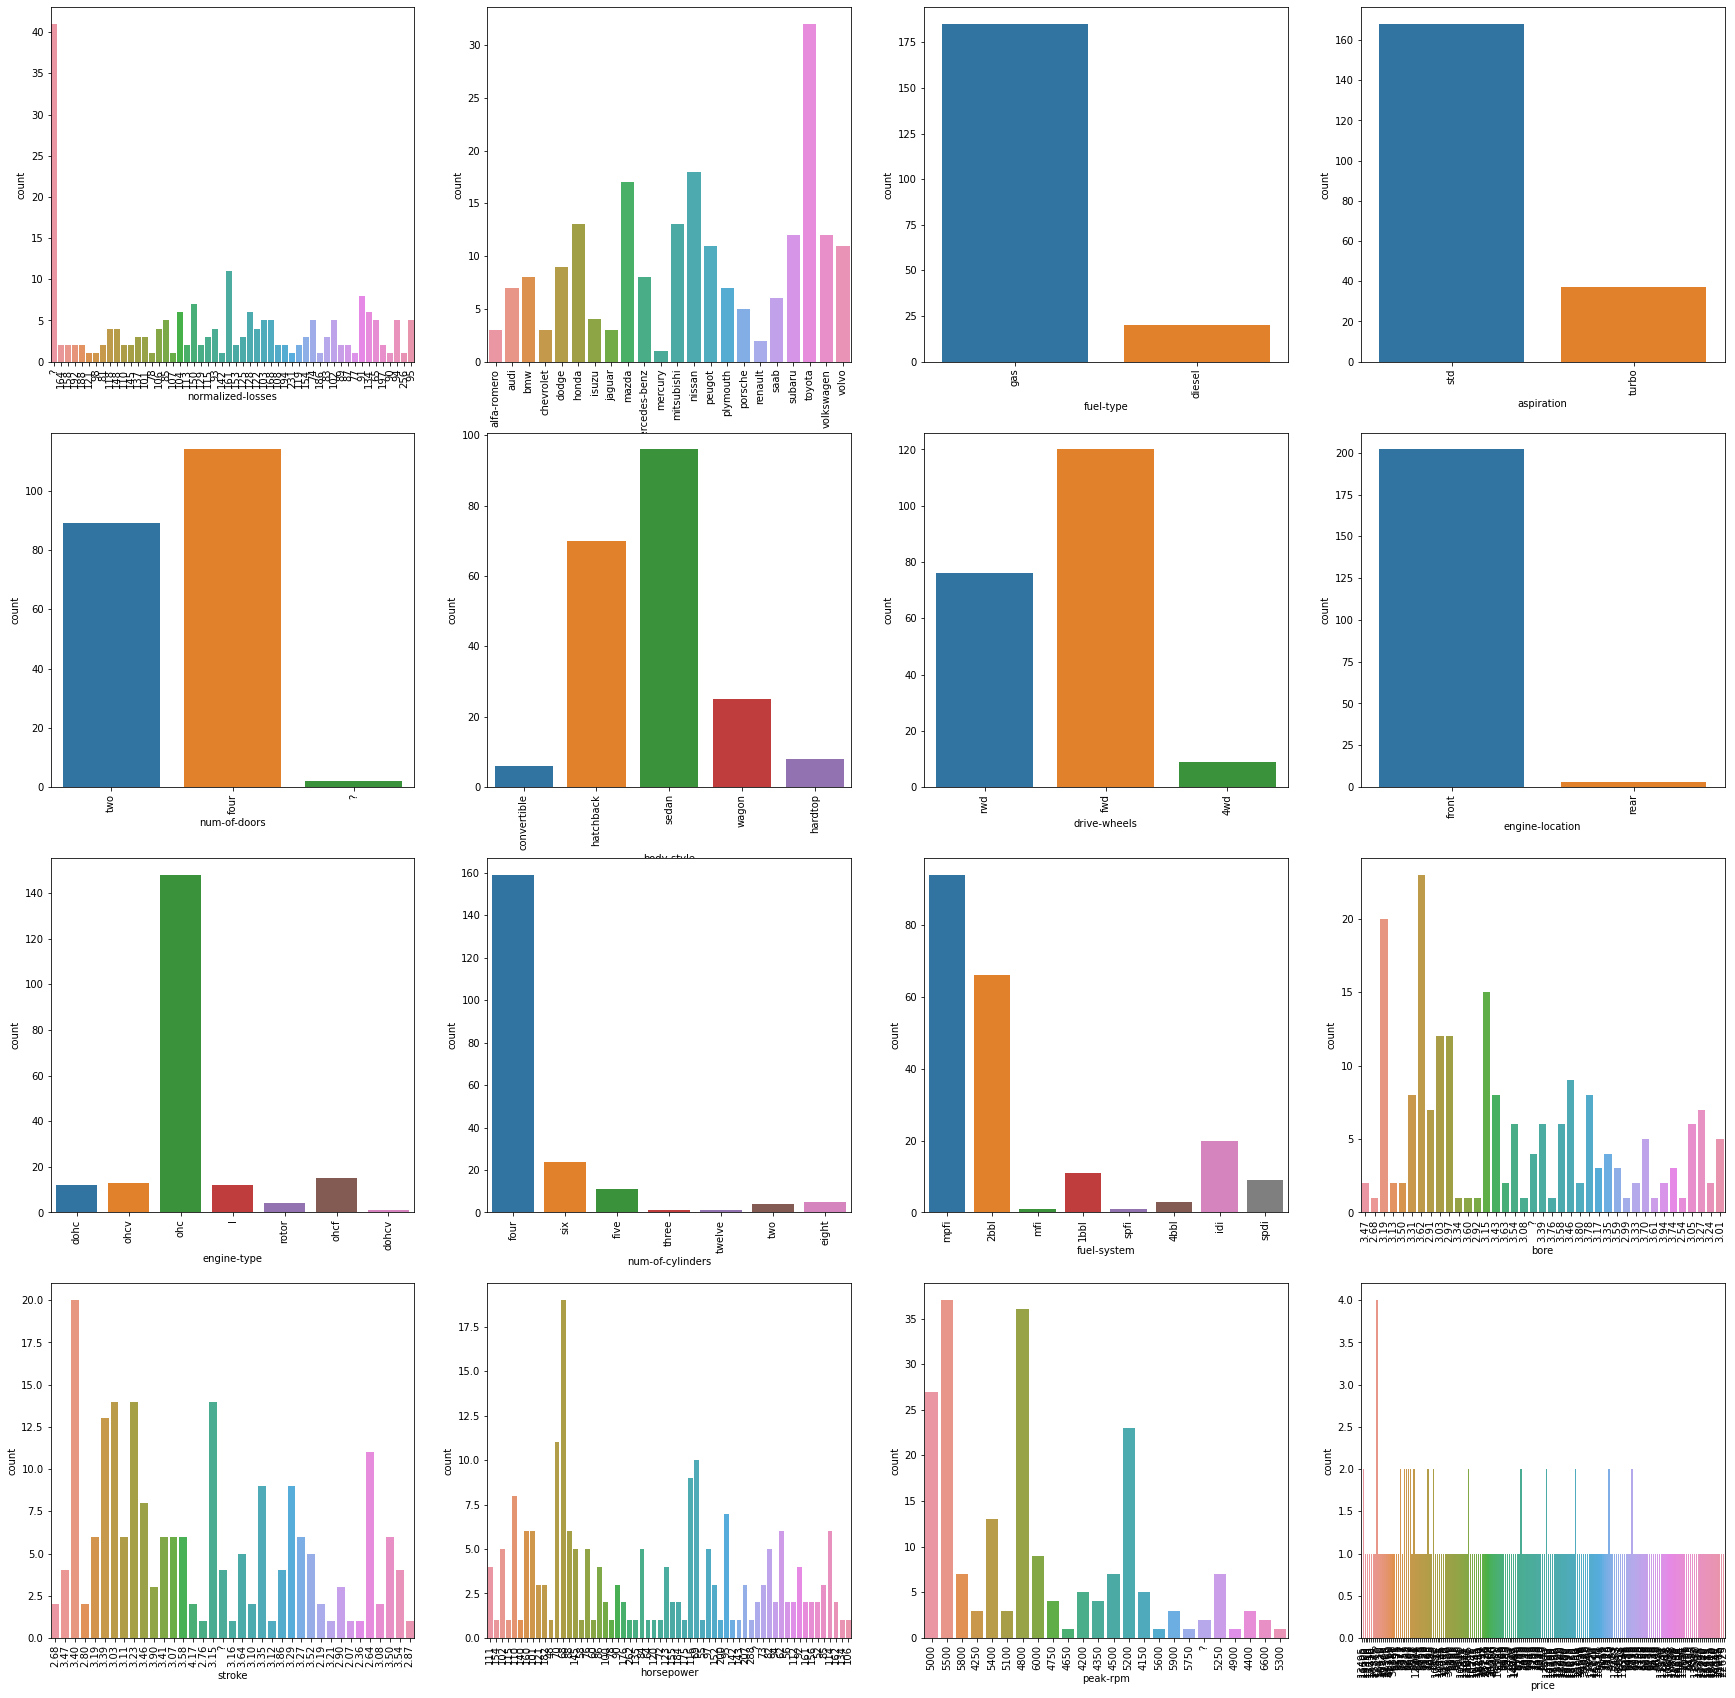

In [ ]:
fig, ax = plt.subplots(4, 4, figsize=(30, 30))

for variable, subplot in zip(cate_columns, ax.flatten()):
  sns.countplot(df[variable], ax=subplot)
  for label in subplot.get_xticklabels():
        label.set_rotation(90)

#### Pairplot

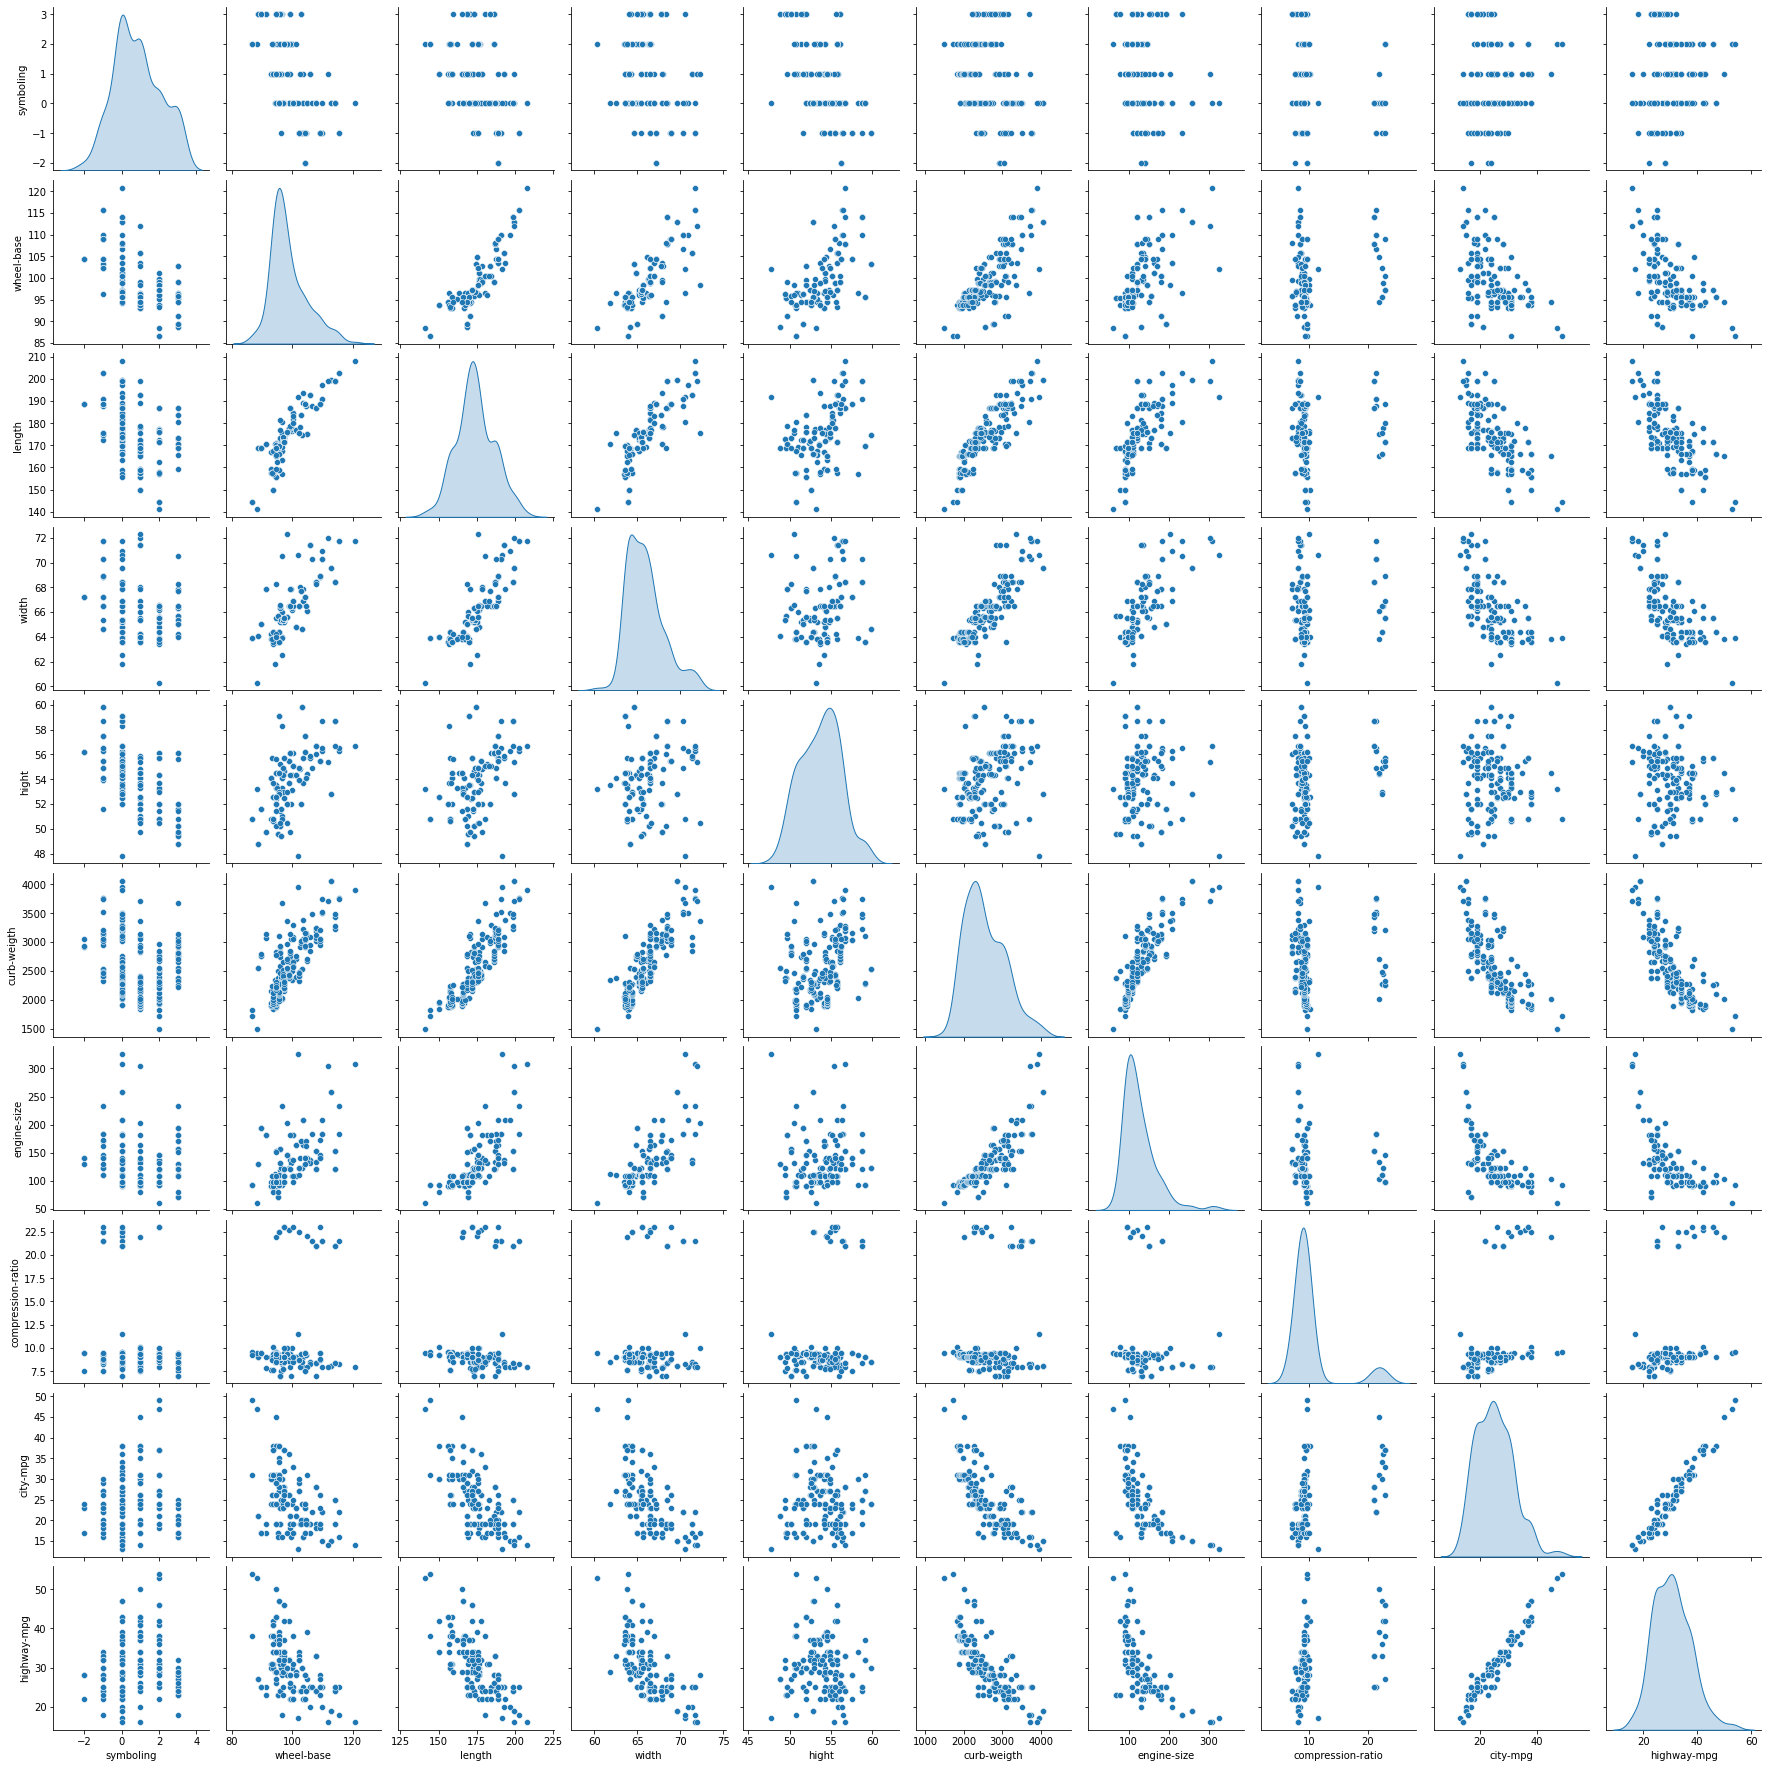

In [ ]:
sns.pairplot(df, diag_kind ="kde")

### Step 3: Data Cleaning

In [ ]:
#check each catergorical value
values= df[['make','fuel-type','aspiration','num-of-doors','body-style','drive-wheels','engine-location','engine-type', 'num-of-cylinders', 'fuel-system']]
for x in range(len(values.columns)):
  print(values.columns[x]+ ":")
  print(values[values.columns[x]].unique())

make:
['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'mazda' 'mercedes-benz' 'mercury' 'mitsubishi' 'nissan' 'peugot'
 'plymouth' 'porsche' 'renault' 'saab' 'subaru' 'toyota' 'volkswagen'
 'volvo']
fuel-type:
['gas' 'diesel']
aspiration:
['std' 'turbo']
num-of-doors:
['two' 'four' '?']
body-style:
['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']
drive-wheels:
['rwd' 'fwd' '4wd']
engine-location:
['front' 'rear']
engine-type:
['dohc' 'ohcv' 'ohc' 'l' 'rotor' 'ohcf' 'dohcv']
num-of-cylinders:
['four' 'six' 'five' 'three' 'twelve' 'two' 'eight']
fuel-system:
['mpfi' '2bbl' 'mfi' '1bbl' 'spfi' '4bbl' 'idi' 'spdi']


#### Replace "?" with NaN
If there has "?", I cannot use PCA and other techniques on data that is missing, so covert the "?" to NaN. 

In [ ]:
# replace '?' with NaN
df_label = df.replace('?',np.NAN) 

# check how many missing values 
missing = df_label.isnull().sum()
missing = missing[missing > 0]
missing.sort_values(inplace=True)
missing

num-of-doors          2
horsepower            2
peak-rpm              2
bore                  4
stroke                4
price                 4
normalized-losses    41
dtype: int64

In [ ]:
#check the numbers of completed row without missing values
df_label.shape[0]- df_label.isnull().sum(axis =0).shape[0]

179

Text(0.5, 1.0, ' Percents of nonmissing data with missingno')

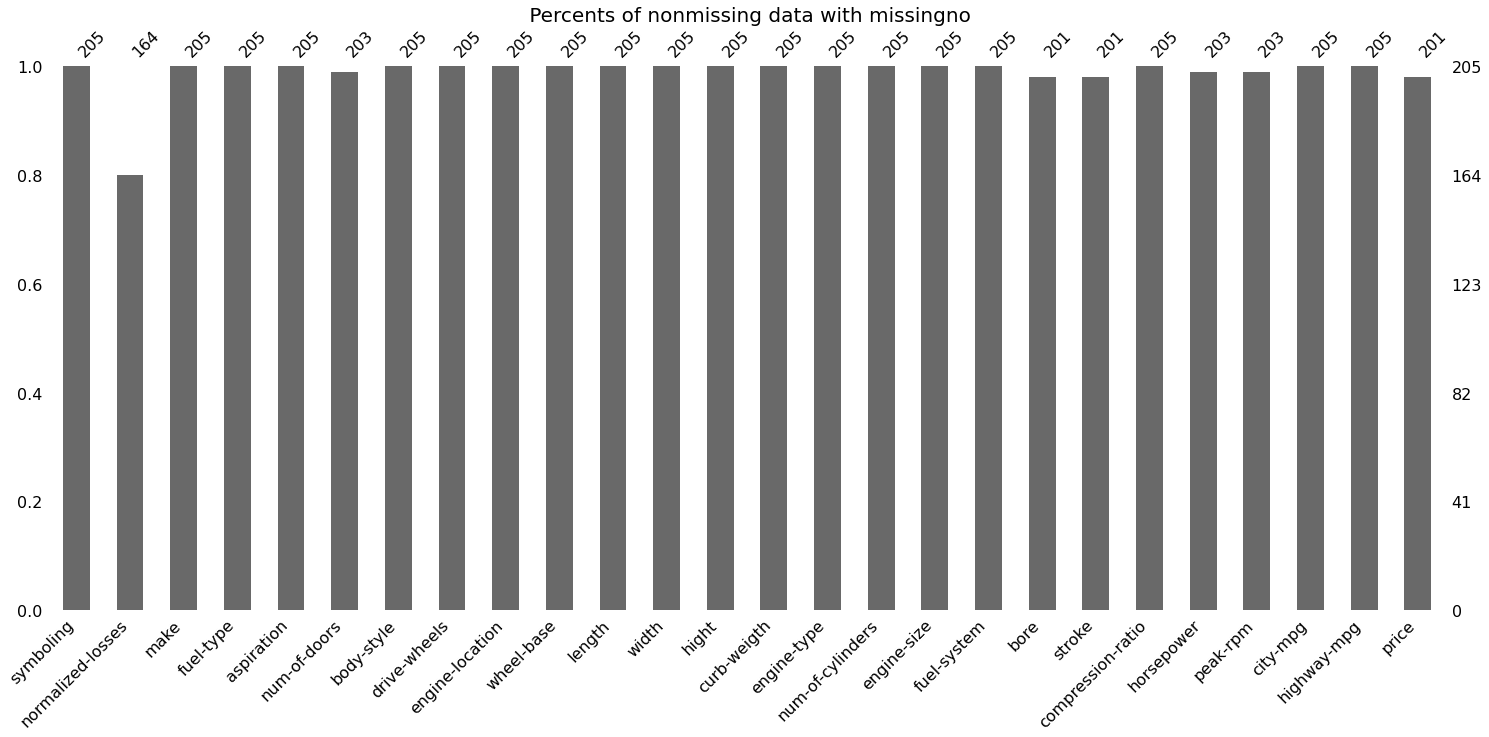

In [ ]:
#create bar
msno.bar(df_label)
plt.title(' Percents of nonmissing data with missingno',fontsize=20)

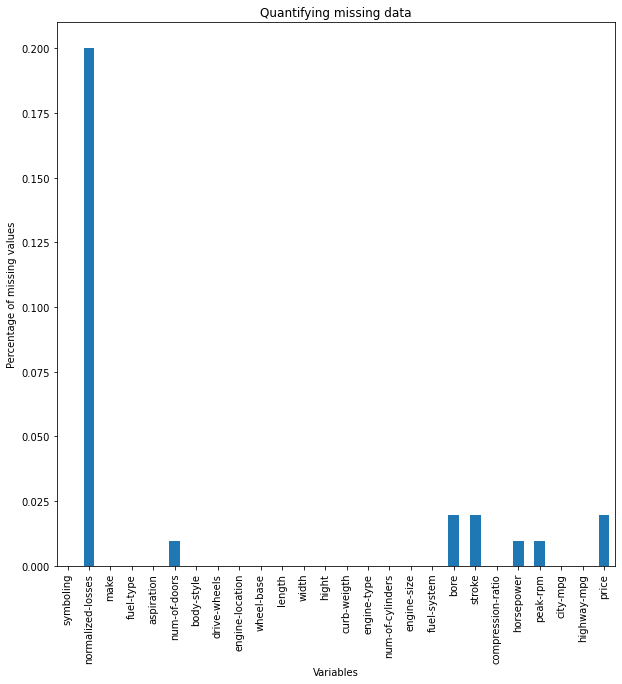

In [ ]:
#check the numbers with missing values 
#prepare column names
variables = df_label.columns.values

#create chart
df_label.isnull().mean().plot.bar(figsize=(10,10))
plt.title("Quantifying missing data")
plt.xlabel('Variables')
plt.ylabel('Percentage of missing values')

#type of imputation
#SI is simple imputer
#II is iterative imputer
df_SI = df_label.copy() 
df_II = df_label.copy() 

#####Finding:
> There has missing values including normalized-losses, bore, stroke, horsepower, peak-rpm, and price attributes. 

#### correct data format

In [ ]:
#convert data with object type of float
df_label[['bore', 'stroke']] = df_label[['bore', 'stroke']].astype('float')
df_label[['normalized-losses', 'horsepower','price','peak-rpm']] = df_label[['normalized-losses','horsepower','price','peak-rpm']].astype("float")

#convert symboling variable to string
df_label[['symboling']] = df_label[['symboling']].astype('str')

#recheck the data info
df_label.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    object 
 1   normalized-losses  164 non-null    float64
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       203 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  hight              205 non-null    float64
 13  curb-weigth        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

##### Re-check numerical and categorical columns

In [ ]:
#the original columns
num_columns = []
cate_columns = []

for x in df.columns[:]:
  if(df[x].dtype == 'object'):
    cate_columns.append(x)
  else:
    num_columns.append(x)

#print out numerical variable and categorical variable
print(f'The original numerical variable: {num_columns}')
print(f'The original categorical variable: {cate_columns}')

The original numerical variable: ['symboling', 'wheel-base', 'length', 'width', 'hight', 'curb-weigth', 'engine-size', 'compression-ratio', 'city-mpg', 'highway-mpg']
The original categorical variable: ['normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 'drive-wheels', 'engine-location', 'engine-type', 'num-of-cylinders', 'fuel-system', 'bore', 'stroke', 'horsepower', 'peak-rpm', 'price']


In [ ]:
#after converting
new_num_columns = []
new_cate_columns = []

for y in df_label.columns[:]:
  if(df_label[y].dtype == 'object'):
    new_cate_columns.append(y)
  else:
    new_num_columns.append(y)

#print out numerical variable and categorical variable
print(f'Converted new numerical variable: {new_num_columns}')
print(f'Converted new categorical variable: {new_cate_columns}')

Converted new numerical variable: ['normalized-losses', 'wheel-base', 'length', 'width', 'hight', 'curb-weigth', 'engine-size', 'bore', 'stroke', 'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']
Converted new categorical variable: ['symboling', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 'drive-wheels', 'engine-location', 'engine-type', 'num-of-cylinders', 'fuel-system']


##### Finding:
>  After converting, there are 15 nuerical variables and 11 categorical variables.

#### Handle missing values

number-of-doors and price variables

In [ ]:
#make a new dataframe
df3 = df_label.copy()

#check any row contain the missing values in num-0f-door
df3[df3['num-of-doors'].isnull()]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
27,1,148.0,dodge,gas,turbo,NaN,sedan,fwd,front,93.7,...,98,mpfi,3.03,3.39,7.6,102.0,5500.0,24,30,8558.0
63,0,NaN,mazda,diesel,std,NaN,sedan,fwd,front,98.8,...,122,idi,3.39,3.39,22.7,64.0,4650.0,36,42,10795.0


In [ ]:
df3[df3['price'].isnull()]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
9,0,NaN,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160.0,5500.0,16,22,NaN
44,1,NaN,isuzu,gas,std,two,sedan,fwd,front,94.5,...,90,2bbl,3.03,3.11,9.6,70.0,5400.0,38,43,NaN
45,0,NaN,isuzu,gas,std,four,sedan,fwd,front,94.5,...,90,2bbl,3.03,3.11,9.6,70.0,5400.0,38,43,NaN
129,1,NaN,porsche,gas,std,two,hatchback,rwd,front,98.4,...,203,mpfi,3.94,3.11,10.0,288.0,5750.0,17,28,NaN


#####Finding:
> Missing data values of num-of-doors are 2.
> Missing data values of price are 4. 

In [ ]:
#check out which door type is the most common type in the sedan cars made by dodge
df3.loc[(df3['body-style'] == 'sedan') & (df3['make'] == 'dodge')]['num-of-doors'].mode()

0    four
dtype: object

In [ ]:
# check out which door type is the most common type in the sedan cars made by mazda
df3.loc[(df3['body-style'] == 'sedan') & (df3['make'] == 'mazda')]['num-of-doors'].mode()

0    four
dtype: object

In [ ]:
# both the modes calculated above are 4.
# fill the missing with 4
df3['num-of-doors']= df3['num-of-doors'].fillna('four')

In [ ]:
# Show the rest of missing values
missing2 = df3.isnull().sum()
missing2 = missing2[missing2 > 0]
missing2.sort_values(inplace=True)
missing2

horsepower            2
peak-rpm              2
bore                  4
stroke                4
price                 4
normalized-losses    41
dtype: int64

In [ ]:
# group by the num-of-doors column
df3.groupby(['num-of-doors']).count()

,symboling,normalized-losses,make,fuel-type,aspiration,body-style,drive-wheels,engine-location,wheel-base,length,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
num-of-doors,,,,,,,,,,,,,,,,,,,,,
four,116,96,116,116,116,116,116,116,116,116,...,116,116,116,116,116,115,115,116,116,115
two,89,68,89,89,89,89,89,89,89,89,...,89,89,85,85,89,88,88,89,89,86


##### Finding:
There are only two types of doors, 2 and 4.


####Imputation for missing values of numerical variable

In [ ]:
from numpy import nan
from numpy import isnan

#create a new dataframe
df4 = df3[new_num_columns]

#imputing missing values using scikit-learn
# retrieve the numpy array
values = df4.values

# define the imputer with "mean" value
imputer = SimpleImputer(missing_values=nan, strategy='mean')

# transform the dataset
transformed_values = imputer.fit_transform(values)

# count the number of NaN values in each column
print('Missing: %d' % isnan(transformed_values).sum())

Missing: 0


In [ ]:
# create a new dataframe and transfer the array to dataframe
df5 = pd.DataFrame(transformed_values)  

df5.columns = ["normalized-losses","wheel-base","length","width","height","curb-weight",
                   "engine-size","bore","stroke","compression_ratio","horsepower","peak-rpm","city-mpg",
                   "highway-mpg","price"]
df5.head()

,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression_ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,122.0,88.6,168.8,64.1,48.8,2548.0,130.0,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,13495.0
1,122.0,88.6,168.8,64.1,48.8,2548.0,130.0,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,16500.0
2,122.0,94.5,171.2,65.5,52.4,2823.0,152.0,2.68,3.47,9.0,154.0,5000.0,19.0,26.0,16500.0
3,164.0,99.8,176.6,66.2,54.3,2337.0,109.0,3.19,3.40,10.0,102.0,5500.0,24.0,30.0,13950.0
4,164.0,99.4,176.6,66.4,54.3,2824.0,136.0,3.19,3.40,8.0,115.0,5500.0,18.0,22.0,17450.0


#### Compare the datas

In [ ]:
#data frame 2
df_label.describe().T

,count,mean,std,min,25%,50%,75%,max
normalized-losses,164.0,122.000000,35.442168,65.00,94.00,115.00,150.00,256.00
wheel-base,205.0,98.756585,6.021776,86.60,94.50,97.00,102.40,120.90
length,205.0,174.049268,12.337289,141.10,166.30,173.20,183.10,208.10
width,205.0,65.907805,2.145204,60.30,64.10,65.50,66.90,72.30
hight,205.0,53.724878,2.443522,47.80,52.00,54.10,55.50,59.80
curb-weigth,205.0,2555.565854,520.680204,1488.00,2145.00,2414.00,2935.00,4066.00
engine-size,205.0,126.907317,41.642693,61.00,97.00,120.00,141.00,326.00
bore,201.0,3.329751,0.273539,2.54,3.15,3.31,3.59,3.94
stroke,201.0,3.255423,0.316717,2.07,3.11,3.29,3.41,4.17
compression-ratio,205.0,10.142537,3.972040,7.00,8.60,9.00,9.40,23.00


In [ ]:
#data frame5
df5.describe().T

,count,mean,std,min,25%,50%,75%,max
normalized-losses,205.0,122.000000,31.681008,65.00,101.00,122.00,137.00,256.00
wheel-base,205.0,98.756585,6.021776,86.60,94.50,97.00,102.40,120.90
length,205.0,174.049268,12.337289,141.10,166.30,173.20,183.10,208.10
width,205.0,65.907805,2.145204,60.30,64.10,65.50,66.90,72.30
height,205.0,53.724878,2.443522,47.80,52.00,54.10,55.50,59.80
curb-weight,205.0,2555.565854,520.680204,1488.00,2145.00,2414.00,2935.00,4066.00
engine-size,205.0,126.907317,41.642693,61.00,97.00,120.00,141.00,326.00
bore,205.0,3.329751,0.270844,2.54,3.15,3.31,3.58,3.94
stroke,205.0,3.255423,0.313597,2.07,3.11,3.29,3.41,4.17
compression_ratio,205.0,10.142537,3.972040,7.00,8.60,9.00,9.40,23.00


##### Finding:
> Only normalized-losses and price have some obvious difference. 
* normalized-losses: it is standard deviation become to 31.681008 from 35.442168 which means the data is less spread as we filled the data. Also, 25%, 50%, 75% are different.

*price: it is stanndard deviation becomes to 7868.768212 from 7947.066342. Also, 25%, 50%, 75% are different.

#### Combine datasets of numerical and categorical variables after removing missing value

In [ ]:
# categorical variables without missing value
df6 = df3[new_cate_columns]
print(df6.info())

# dataset consists of numberical variables without missing value
print(df5.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   symboling         205 non-null    object
 1   make              205 non-null    object
 2   fuel-type         205 non-null    object
 3   aspiration        205 non-null    object
 4   num-of-doors      205 non-null    object
 5   body-style        205 non-null    object
 6   drive-wheels      205 non-null    object
 7   engine-location   205 non-null    object
 8   engine-type       205 non-null    object
 9   num-of-cylinders  205 non-null    object
 10  fuel-system       205 non-null    object
dtypes: object(11)
memory usage: 17.7+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   normalized-losses  205 non-null    float64
 

In [ ]:
#combine these two
df7 = pd.concat([df5, df6], axis=1)
df7.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   normalized-losses  205 non-null    float64
 1   wheel-base         205 non-null    float64
 2   length             205 non-null    float64
 3   width              205 non-null    float64
 4   height             205 non-null    float64
 5   curb-weight        205 non-null    float64
 6   engine-size        205 non-null    float64
 7   bore               205 non-null    float64
 8   stroke             205 non-null    float64
 9   compression_ratio  205 non-null    float64
 10  horsepower         205 non-null    float64
 11  peak-rpm           205 non-null    float64
 12  city-mpg           205 non-null    float64
 13  highway-mpg        205 non-null    float64
 14  price              205 non-null    float64
 15  symboling          205 non-null    object 
 16  make               205 non

Text(0.5, 0, 'Dataset with no missing')

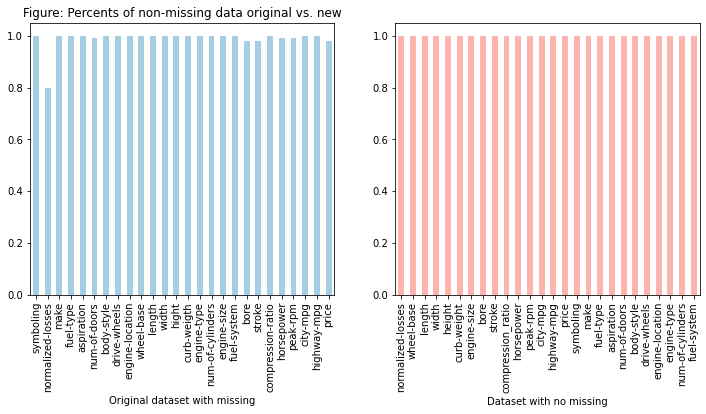

In [ ]:
#comapre the percentage of no missing data
plt.figure(figsize=(12,5))

plt.subplot(121)
(1 - df_label.isnull().mean()).abs().plot(kind='bar',colormap='Paired')
plt.xlabel('Original dataset with missing')
plt.title('Figure: Percents of non-missing data original vs. new')

plt.subplot(122)
(1 - df7.isnull().mean()).abs().plot(kind='bar',colormap='Pastel1')
plt.xlabel('Dataset with no missing')

##### Results:
>no more missing values in the new data frame.

#### Detect Outliers

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f36f35f9610>,
      dtype=object)

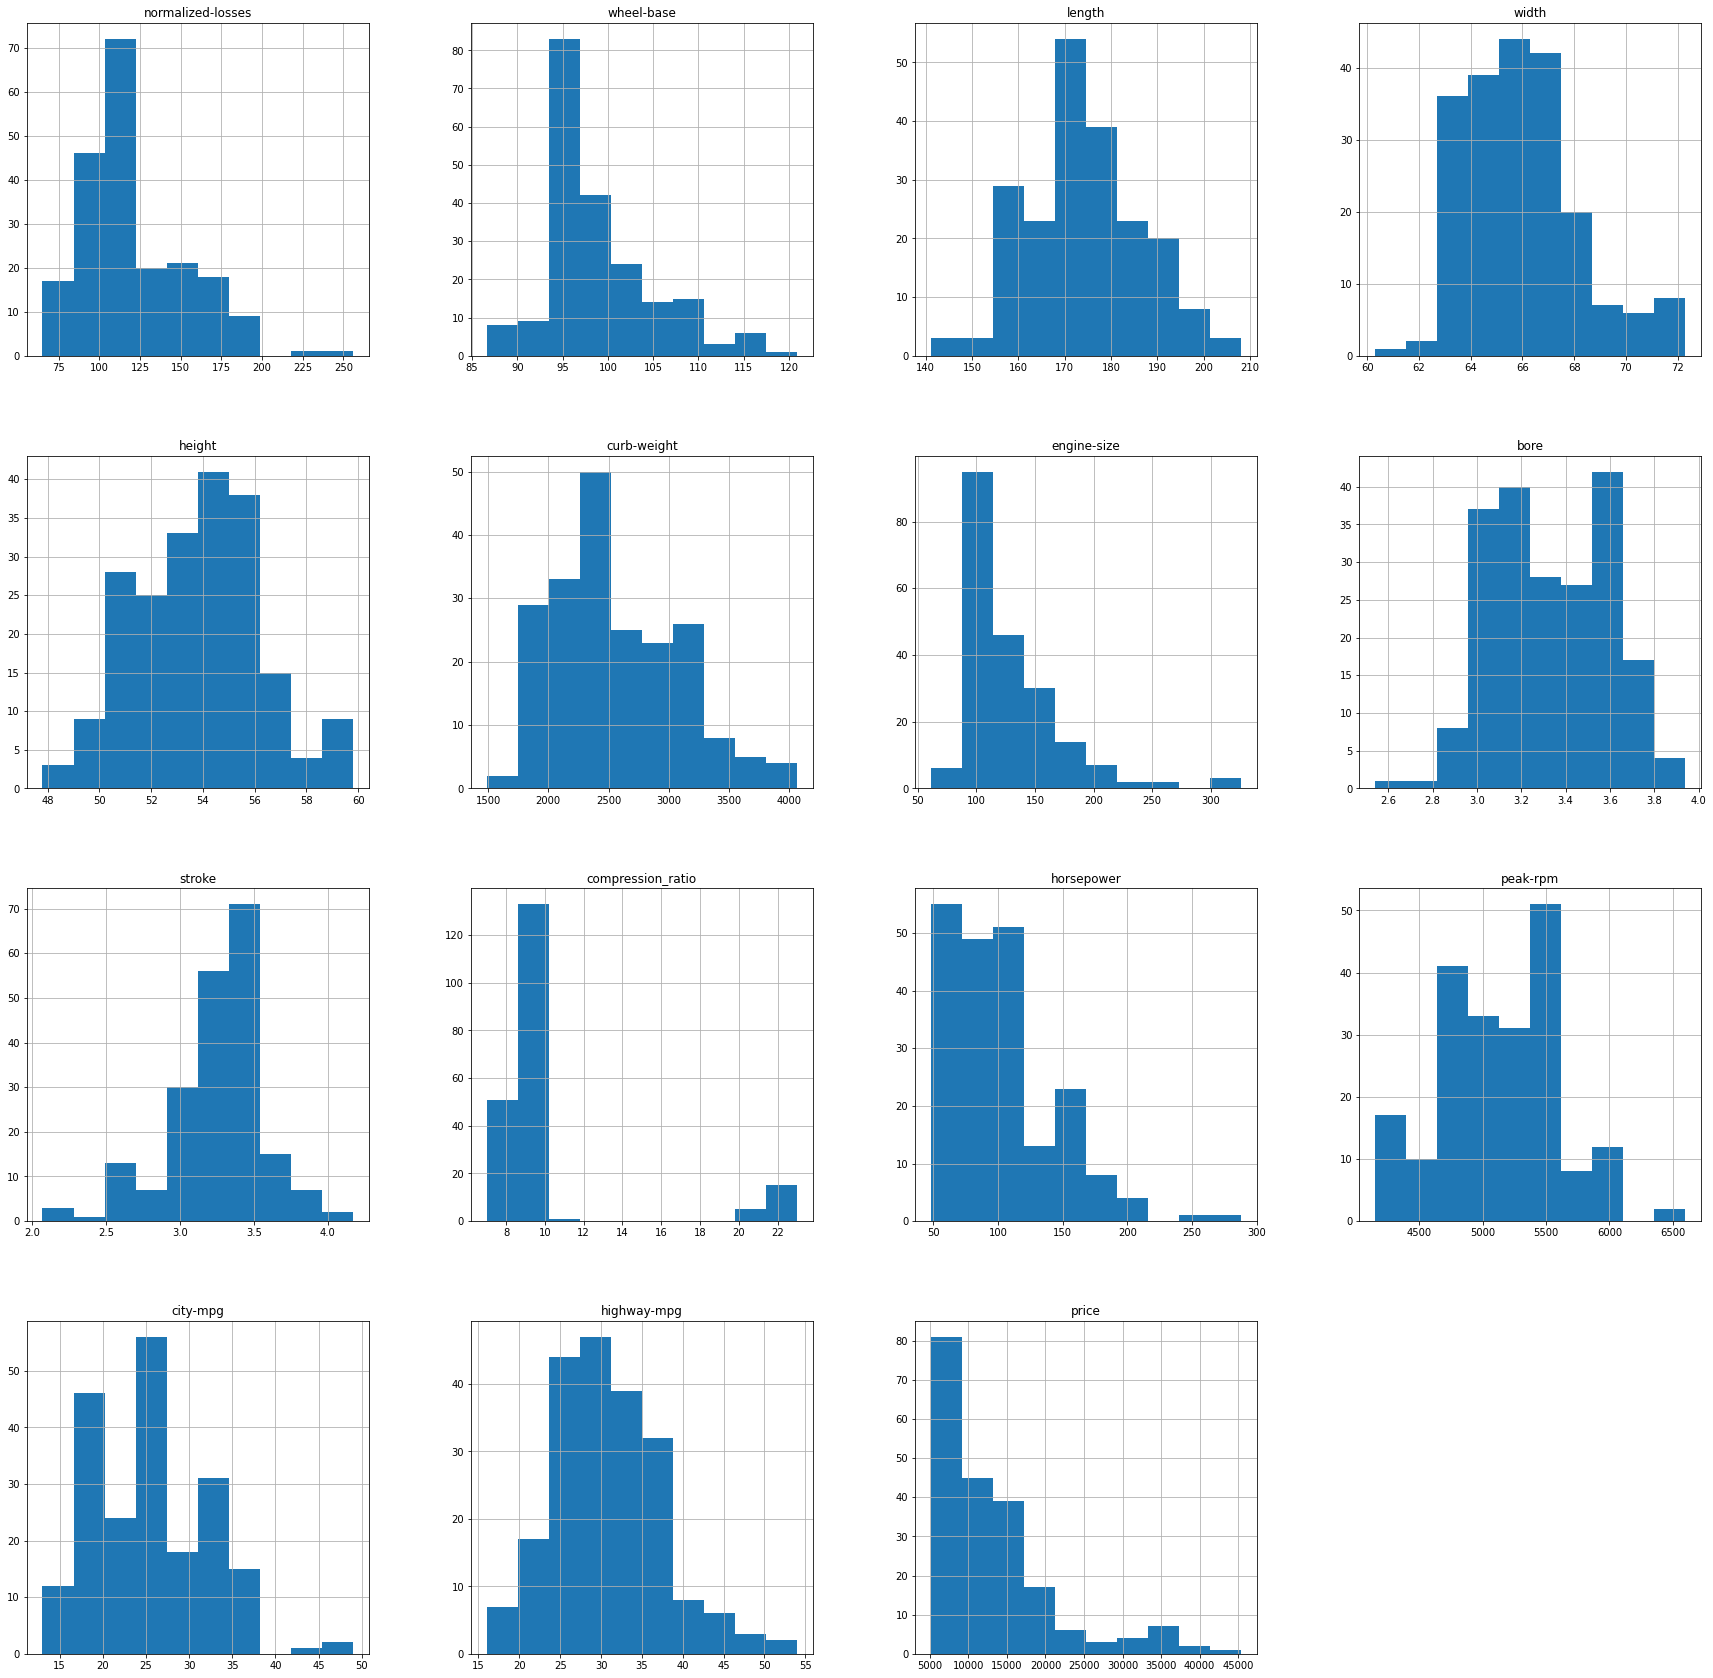

In [ ]:
#create hitogram
df7.hist()

##### Finding:
>the scales of the numerical variables are different.

###Subplots

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

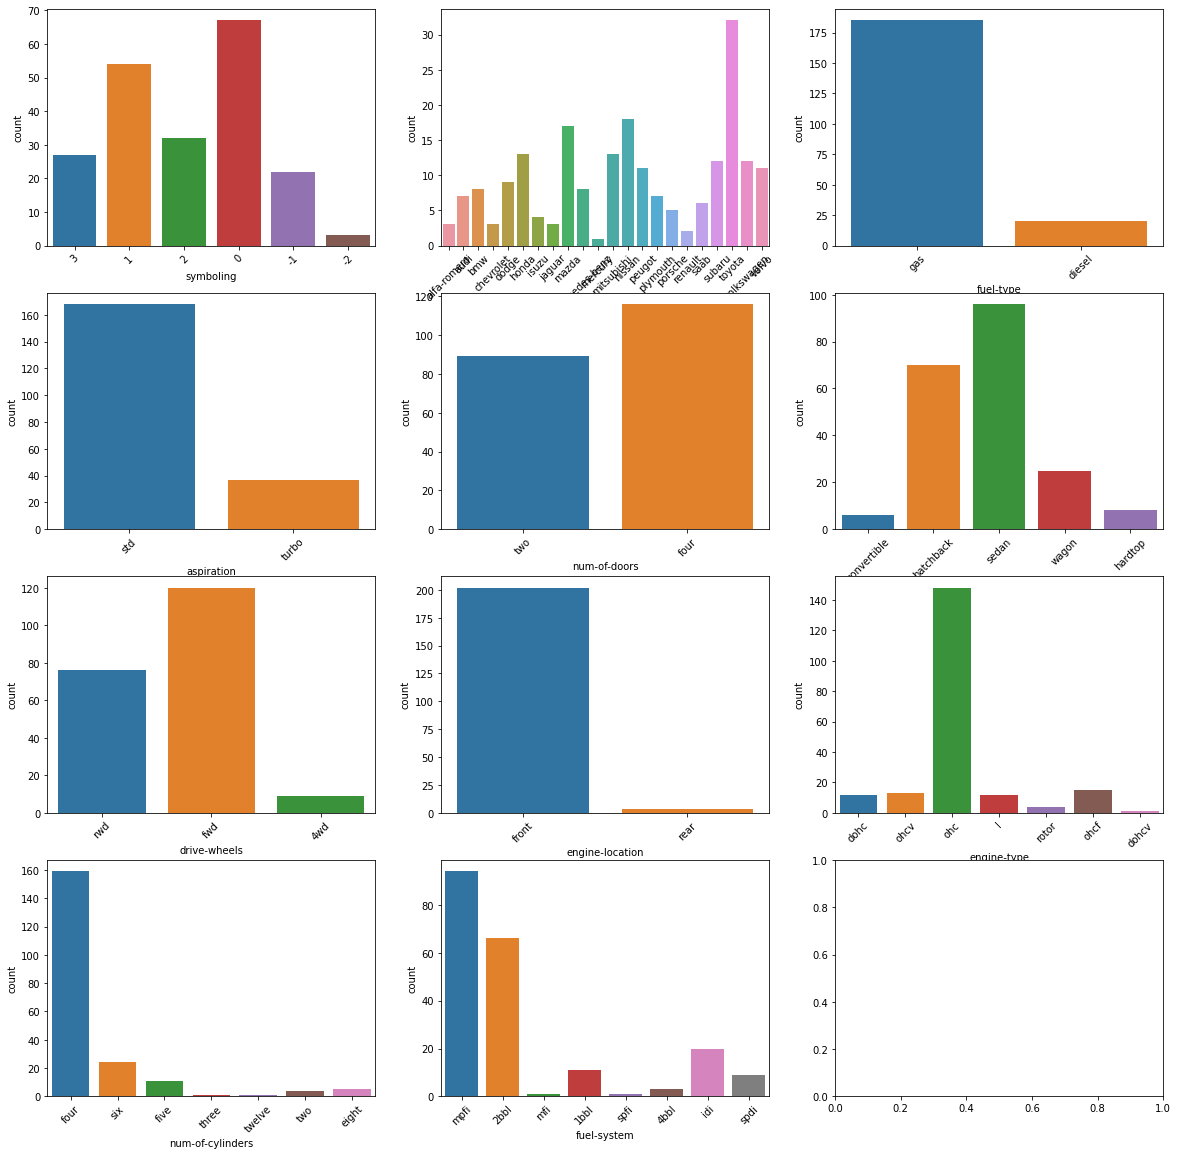

In [ ]:
fig, ax = plt.subplots(4, 3, figsize=(20, 20))
for variable, subplot in zip(new_cate_columns, ax.flatten()):
    sns.countplot(df6[variable], ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(45)

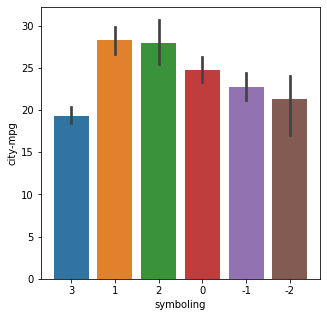

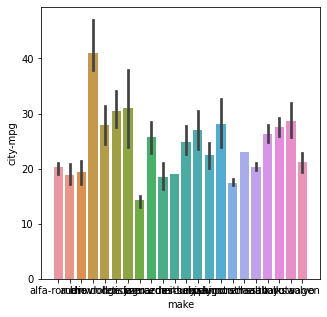

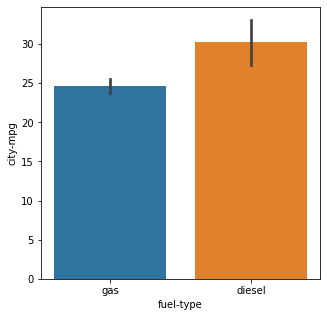

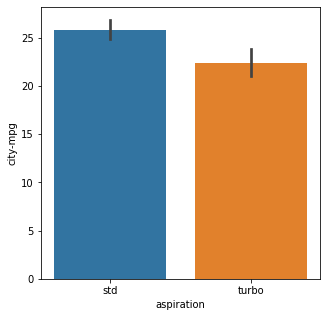

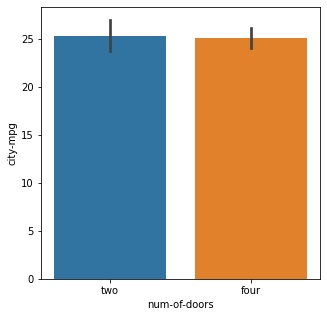

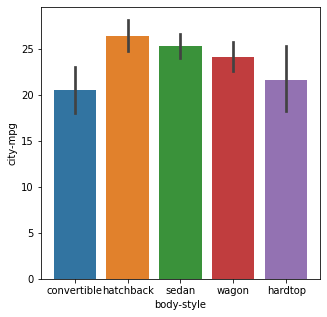

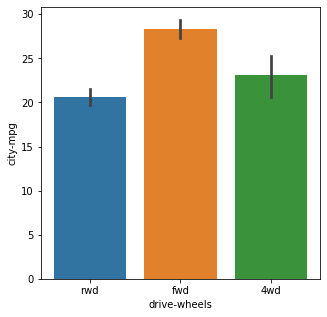

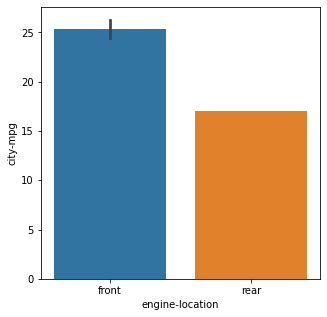

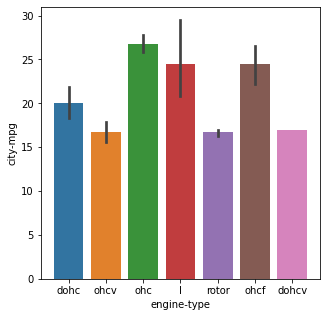

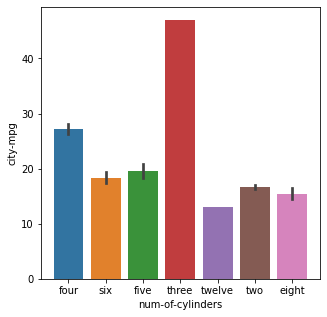

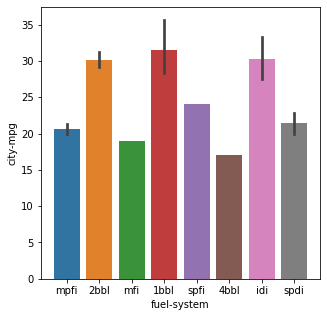

In [ ]:
#categorical variable bar chart
for q in new_cate_columns:
    plt.figure(figsize =(5,5))
    sns.barplot(x= q, y='city-mpg', data=df7)
    plt.plot()

##### Finding:
>Number of doors does not affet the mpg. 

KeyError: ignored

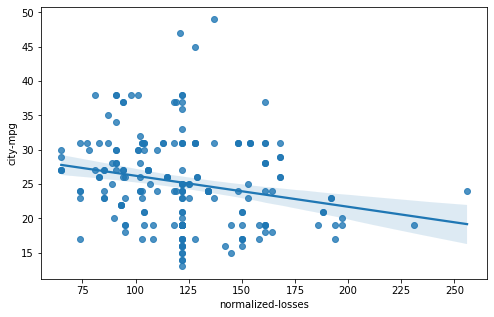

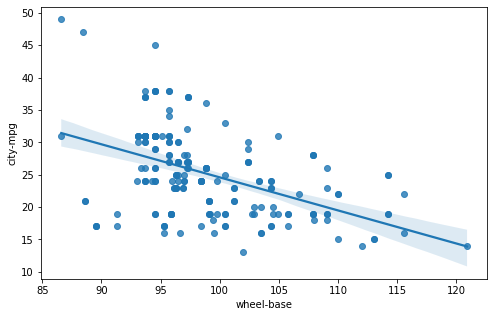

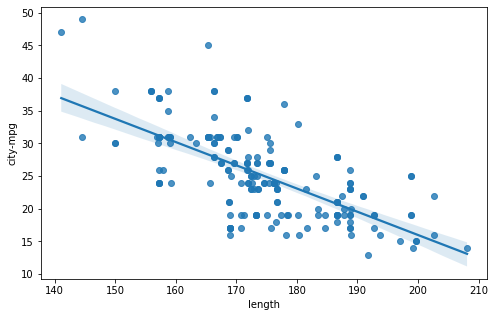

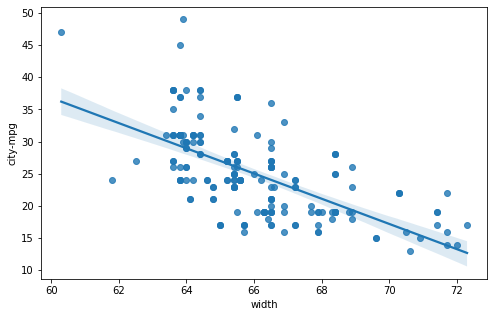

<Figure size 576x360 with 0 Axes>

In [ ]:
#the linear regression plots of the numerical variables
for r in new_num_columns[:-1]:
    plt.figure(figsize=(8, 5))
    sns.regplot(x=r, y='city-mpg', data=df7)
    plt.plot()

#####Finding:
> *normalized-losses, wheel-base, length, width, height, curb-weight, engine-size, bore, stroke, horsepower, peark-rpm have the negative replationship with the city-mpg. The is means when the values of these variables increase the city-mpg decrease. 

#### Matplotlib(Bar)
x-axis is engine-size and y-axis is stroke.

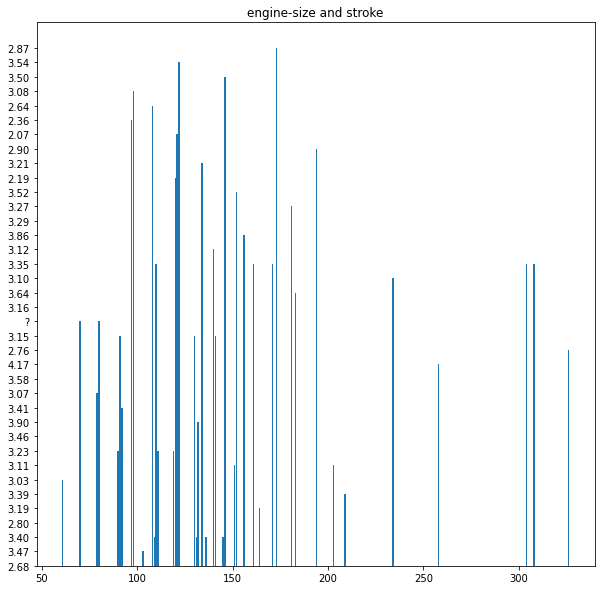

In [ ]:
x = df['engine-size'].tolist()
y = df['stroke'].tolist()

plt.figure(figsize=(10,10))
plt.bar(list(x),list(y))
plt.title("engine-size and stroke")
plt.show()

#### Boxplot
* Consider the engine-size and stroke variables. 


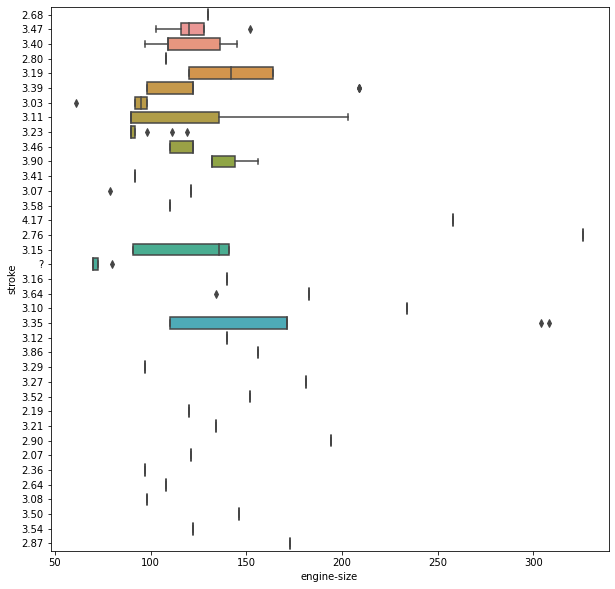

In [ ]:
plt.figure(figsize=(10,10))
sns.boxplot(x='engine-size', y='stroke', data =df)

##### Finding:
> * There has "?" between 3.15 and 3.16 in y-axis(stroke) 
* Less then 200 engine-size has hight stokes

###Step4: Feature Engineering 

####create dummy variables

In [ ]:
#define the list of categorical 
c_columns = ['symboling', 'make','fuel-type', 'aspiration','num-of-doors','body-style','drive-wheels',
              'engine-location','engine-type','num-of-cylinders','fuel-system']

#create dummy variables 
df_dummy = pd.get_dummies(df7, prefix_sep="_", columns=c_columns, drop_first=True)

#size of the dataset
df_dummy.shape

#check columns
df_dummy.columns

Index(['normalized-losses', 'wheel-base', 'length', 'width', 'height',
       'curb-weight', 'engine-size', 'bore', 'stroke', 'compression_ratio',
       'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price',
       'symboling_-2', 'symboling_0', 'symboling_1', 'symboling_2',
       'symboling_3', 'make_audi', 'make_bmw', 'make_chevrolet', 'make_dodge',
       'make_honda', 'make_isuzu', 'make_jaguar', 'make_mazda',
       'make_mercedes-benz', 'make_mercury', 'make_mitsubishi', 'make_nissan',
       'make_peugot', 'make_plymouth', 'make_porsche', 'make_renault',
       'make_saab', 'make_subaru', 'make_toyota', 'make_volkswagen',
       'make_volvo', 'fuel-type_gas', 'aspiration_turbo', 'num-of-doors_two',
       'body-style_hardtop', 'body-style_hatchback', 'body-style_sedan',
       'body-style_wagon', 'drive-wheels_fwd', 'drive-wheels_rwd',
       'engine-location_rear', 'engine-type_dohcv', 'engine-type_l',
       'engine-type_ohc', 'engine-type_ohcf', 'engine-type_ohcv',
 

####Split data into training and testing subsets

In [ ]:
#create x and y
X = df_dummy.drop(['city-mpg'], axis=1)
Y = df_dummy[['city-mpg']]

# Now split the data into training and testing subsets. 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=12)

X_train.head()

,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression_ratio,...,num-of-cylinders_three,num-of-cylinders_twelve,num-of-cylinders_two,fuel-system_2bbl,fuel-system_4bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi,fuel-system_spfi
204,95.0,109.1,188.8,68.9,55.5,3062.0,141.0,3.78,3.15,9.5,...,0,0,0,0,0,0,0,1,0,0
137,104.0,99.1,186.6,66.5,56.1,2847.0,121.0,3.54,3.07,9.0,...,0,0,0,0,0,0,0,1,0,0
45,122.0,94.5,155.9,63.6,52.0,1909.0,90.0,3.03,3.11,9.6,...,0,0,0,1,0,0,0,0,0,0
187,94.0,97.3,171.7,65.5,55.7,2319.0,97.0,3.01,3.40,23.0,...,0,0,0,0,0,1,0,0,0,0
33,101.0,93.7,150.0,64.0,52.6,1940.0,92.0,2.91,3.41,9.2,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
#check the results
print('Training dataset shape:', X_train.shape, Y_train.shape)
print('Testing dataset shape:', X_test.shape, Y_test.shape)

Training dataset shape: (143, 69) (143, 1)
Testing dataset shape: (62, 69) (62, 1)


### Step5: Conclusion:


This data used 205 observation and 26 attributes. the purpose of this study is examine the factors that can predict the average MPG for our car in the city. I used the graph to show and explain the data. There has 4 different steps, it load data into the data frame from GitHub, exploratory dadta analysis, data cleaning, feature engineering. I explained the questions in step 1 to 4. 

There has missing values including normalized-losses, bore, stroke, horsepower, peak-rpm, and price attributes.
And when we checked hitogram, the scales of the numerical variables are different. And number of door is not affect mpg. Also, Less then 200 engine-size has hight stokes. Moreover,normalized-losses, wheel-base, length, width, height, curb-weight, engine-size, bore, stroke, horsepower, peark-rpm have the negative replationship with the city-mpg. The is means when the values of these variables increase the city-mpg decrease. 